In [1]:
import glob
import os

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io

from helpers.cell_type_naming import nice_to_weirds, weird_to_nice

plotly.io.renderers.default = "jupyterlab+png"

In [2]:
# PARAM
results_dir = "5d_results_noise_0.1"

### load tirosh sc data

In [3]:
sc_rna_seq = pd.read_csv(
    "gs://liulab/ftp/GSE115978/GSE115978_tpm.csv",
    index_col=0,
).rename_axis(index="GeneSymbol", columns="cells")

g = len(sc_rna_seq)

sc_rna_seq

cells       cy78_CD45_neg_1_B04_S496_comb  \
GeneSymbol                                  
C9orf152                         0.000000   
RPS11                            8.144184   
ELMO2                            2.639232   
CREB3L1                          0.000000   
PNMA1                            3.656496   
...                                   ...   
PIK3IP1                          0.936591   
SNRPD2                           5.374866   
SLC39A6                          3.326681   
CTSC                             2.612352   
AQP7                             0.000000   

cells       cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb  CY88_5_B10_S694_comb  \
GeneSymbol                                                                   
C9orf152                                    0.000000              0.000000   
RPS11                                       5.915091              7.243164   
ELMO2                                       0.000000              0.732052   
CREB3L1                                     0.000000              0.000000   
PNMA1                                       0.000000              0.536053   
...                                              ...                   ...   
PIK3IP1                                     5.761498              0.000000   
SNRPD2                                      0.000000              5.437661   
SLC39A6                                     0.000000              1.308011   
CTSC                                        0.000000              2.361768   
AQP7                                        0.000000              0.000000   

cells       cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb  \
GeneSymbol                                                    
C9orf152                                           0.000000   
RPS11                                              6.019502   
ELMO2                                              3.687956   
CREB3L1                                            0.000000   
PNMA1                                              3.041418   
...                                                     ...   
PIK3IP1                                            0.000000   
SNRPD2                                             6.240581   
SLC39A6                                            3.516141   
CTSC                                               1.094236   
AQP7                                               0.000000   

cells       cy78_CD45_neg_3_H06_S762_comb  \
GeneSymbol                                  
C9orf152                         0.000000   
RPS11                            7.974753   
ELMO2                            2.599318   
CREB3L1                          0.000000   
PNMA1                            4.132741   
...                                   ...   
PIK3IP1                          2.034216   
SNRPD2                           5.946754   
SLC39A6                          3.868390   
CTSC                             1.934705   
AQP7                             0.000000   

cells       cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_G01_S73_comb  \
GeneSymbol                                                    
C9orf152                                           0.000000   
RPS11                                              5.557257   
ELMO2                                              1.691087   
CREB3L1                                            0.000000   
PNMA1                                              2.827006   
...                                                     ...   
PIK3IP1                                            0.000000   
SNRPD2                                             4.628132   
SLC39A6                                            1.791189   
CTSC                                               0.852798   
AQP7                                               0.000000   

cells       cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D09_S141_comb  \
GeneSymbol                                                     
C9orf152                                     

In [4]:
sc_rna_seq_metadata = pd.read_csv(
    "gs://liulab/ftp/GSE115978/GSE115978_cell.annotations.csv",
).replace({"cell.types": weird_to_nice})

sc_rna_seq_metadata

cells samples cell.types  \
0                       cy78_CD45_neg_1_B04_S496_comb   Mel78  Malignant   
1            cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb   Mel79  Malignant   
2                                CY88_5_B10_S694_comb   Mel88  Malignant   
3     cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb   Mel79  Malignant   
4                       cy78_CD45_neg_3_H06_S762_comb   Mel78  Malignant   
...                                               ...     ...        ...   
7181                CY75_1_CD45_CD8_3__S168_comb_BCD8   Mel75      T CD8   
7182                CY75_1_CD45_CD8_8__S338_comb_BCD8   Mel75      T CD8   
7183                       monika_D7_S132_comb_BCD8_3   Mel75      T CD8   
7184                CY75_1_CD45_CD8_8__S289_comb_BCD8   Mel75      T CD8   
7185                CY75_1_CD45_CD8_8__S351_comb_BCD8   Mel75      T CD8   

      treatment.group  Cohort  no.of.genes  no.of.reads  
0      post.treatment  Tirosh         8258       357919  
1     treatment.naive  Tirosh         2047         5727  
2      post.treatment  Tirosh         5375       139218  
3     treatment.naive  Tirosh         5648        73996  
4      post.treatment  Tirosh         7409       380341  
...               ...     ...          ...          ...  
7181   post.treatment  Tirosh         3530       137245  
7182   post.treatment  Tirosh         3872       106432  
7183   post.treatment  Tirosh         4589       908173  
7184   post.treatment  Tirosh         4614       140903  
7185   post.treatment  Tirosh         3859       222239  

[7186 rows x 7 columns]

In [5]:
sc_rna_seq_metadata["samples"].value_counts()

Mel79       894
Mel75       506
Mel80       431
Mel89       391
Mel88       352
Mel102      322
Mel103      317
Mel94       311
Mel98       270
Mel110      258
Mel194      249
Mel105      234
Mel60       226
Mel81       205
Mel106      190
Mel72       181
Mel129pa    179
Mel84       159
Mel478      154
Mel74       147
Mel53       143
Mel58       142
Mel78       124
Mel112      113
Mel121.1    105
Mel126       95
Mel71        89
Mel128       89
Mel116       84
Mel82        84
Mel04.3      78
Mel129pb     64
Name: samples, dtype: int64

In [6]:
sc_rna_seq_metadata["cell.types"].value_counts().sort_index()

?               307
B               818
CAF             106
Endothelial     104
Macrophage      420
Malignant      2018
NK               92
T CD4           856
T CD8          1759
T.cell          706
Name: cell.types, dtype: int64

In [7]:
cell_types = list(sorted(
    cell_type
    for cell_type in sc_rna_seq_metadata["cell.types"].unique()
    if cell_type not in ["?"]
))

c = len(cell_types)

cell_types

['B',
 'CAF',
 'Endothelial',
 'Macrophage',
 'Malignant',
 'NK',
 'T CD4',
 'T CD8',
 'T.cell']

In [8]:
s = 20  # number of samples
samples = pd.Series([f"sample_{j:03d}" for j in range(s)], name="Mixture")
samples

0     sample_000
1     sample_001
2     sample_002
3     sample_003
4     sample_004
5     sample_005
6     sample_006
7     sample_007
8     sample_008
9     sample_009
10    sample_010
11    sample_011
12    sample_012
13    sample_013
14    sample_014
15    sample_015
16    sample_016
17    sample_017
18    sample_018
19    sample_019
Name: Mixture, dtype: object

In [9]:
rng = np.random.default_rng(seed=0)

proportions = rng.dirichlet((0.5,) * c, size=(s,))
fraction_values = np.array([rng.multinomial(50, p) for p in proportions]) / 50

fractions = pd.DataFrame(
    fraction_values,
    index=samples,
    columns=cell_types
)

fractions_and_empty_csx_metrics = fractions.copy()
fractions_and_empty_csx_metrics[["P-value", "Correlation", "RMSE"]] = (0, 0, 0)

fractions_and_empty_csx_metrics.head()
# how sparse are the counts?
# print((cell_type_counts_per_sample == 0).mean())

fractions_and_empty_csx_metrics

B   CAF  Endothelial  Macrophage  Malignant    NK  T CD4  \
Mixture                                                                   
sample_000  0.12  0.00         0.12        0.06       0.02  0.20   0.14   
sample_001  0.04  0.00         0.24        0.08       0.22  0.22   0.00   
sample_002  0.10  0.12         0.04        0.00       0.00  0.20   0.42   
sample_003  0.02  0.18         0.00        0.06       0.04  0.22   0.10   
sample_004  0.04  0.04         0.04        0.08       0.00  0.26   0.00   
sample_005  0.30  0.02         0.26        0.04       0.00  0.00   0.16   
sample_006  0.34  0.00         0.10        0.00       0.06  0.06   0.00   
sample_007  0.06  0.28         0.08        0.00       0.06  0.00   0.00   
sample_008  0.02  0.04         0.00        0.22       0.22  0.06   0.28   
sample_009  0.28  0.04         0.12        0.02       0.14  0.00   0.04   
sample_010  0.10  0.00         0.00        0.00       0.26  0.32   0.22   
sample_011  0.14  0.12         0.16        0.02       0.04  0.06   0.00   
sample_012  0.14  0.00         0.08        0.06       0.18  0.22   0.26   
sample_013  0.06  0.00         0.02        0.10       0.40  0.04   0.24   
sample_014  0.04  0.22         0.06        0.02       0.10  0.50   0.00   
sample_015  0.16  0.04         0.18        0.02       0.06  0.38   0.12   
sample_016  0.00  0.18         0.02        0.00       0.22  0.00   0.02   
sample_017  0.00  0.26         0.02        0.36       0.00  0.12   0.02   
sample_018  0.08  0.00         0.14        0.00       0.10  0.22   0.08   
sample_019  0.00  0.00         0.00        0.00       0.28  0.08   0.16   

            T CD8  T.cell  P-value  Correlation  RMSE  
Mixture                                                
sample_000   0.12    0.22        0            0     0  
sample_001   0.10    0.10        0            0     0  
sample_002   0.06    0.06        0            0     0  
sample_003   0.12    0.26        0            0     0  
sample_004   0.52    0.02        0            0     0  
sample_005   0.18    0.04        0            0     0  
sample_006   0.12    0.32        0            0     0  
sample_007   0.02    0.50        0            0     0  
sample_008   0.16    0.00        0            0     0  
sample_009   0.20    0.16        0            0     0  
sample_010   0.00    0.10        0            0     0  
sample_011   0.26    0.20        0            0     0  
sample_012   0.00    0.06        0            0     0  
sample_013   0.12    0.02        0            0     0  
sample_014   0.06    0.00        0            0     0  
sample_015   0.02    0.02        0            0     0  
sample_016   0.50    0.06        0            0     0  
sample_017   0.22    0.00        0            0     0  
sample_018   0.18    0.20        0            0     0  
sample_019   0.18    0.30        0            0     0

In [10]:
cell_type_single_cells = {
    cell_type: sc_rna_seq_metadata.set_index(["cell.types", "cells"]).loc[cell_type].index.tolist()
    for cell_type in cell_types
}

for cell_type, stuff in cell_type_single_cells.items():
    print(cell_type, len(stuff))

B 818
CAF 106
Endothelial 104
Macrophage 420
Malignant 2018
NK 92
T CD4 856
T CD8 1759
T.cell 706


In [11]:
n_cells_per_gep = 5  # PARAM
# note - increasing this param increases the correlation between sample GEPs per cell type

rng = np.random.default_rng(seed=0)

def make_a_cell_type_gep(cell_type, n_cells_per_gep=5):
    # sample with replacement from single cell data
    sampled_cells = rng.choice(cell_type_single_cells[cell_type], n_cells_per_gep)
    gep = sc_rna_seq[sampled_cells].mean(axis='columns')
    gep *= 100000 / gep.sum()
    return gep

sample_cell_type_geps = pd.concat({
    sample: pd.DataFrame({
        cell_type: make_a_cell_type_gep(cell_type, n_cells_per_gep) 
        for cell_type in cell_types
    })
    for sample in samples
}).rename_axis(columns="cell_type")

In [12]:
sample_cell_type_geps

cell_type                      B        CAF  Endothelial  Macrophage  \
           GeneSymbol                                                  
sample_000 C9orf152     0.000000   0.000000     0.000000    0.000000   
           RPS11       93.816258  53.313483    53.516824   63.651543   
           ELMO2        8.408418   4.196476     0.000000    9.479460   
           CREB3L1      0.000000   3.528394     0.000000    0.000000   
           PNMA1        0.000000   7.129496     0.000000   10.595397   
...                          ...        ...          ...         ...   
sample_019 PIK3IP1     52.371554   0.000000     1.293928    7.544717   
           SNRPD2      45.610434  34.775028    20.546510   32.382830   
           SLC39A6      0.000000  14.172254     0.000000    0.000000   
           CTSC        19.137292  23.627781    26.403539   63.482628   
           AQP7         0.000000   0.000000     0.000000    0.000000   

cell_type              Malignant         NK      T CD4      T CD8     T.cell  
           GeneSymbol                                                         
sample_000 C9orf152     0.000000   0.000000   0.000000   0.000000   0.000000  
           RPS11       47.819273  68.389910  80.802680  70.155542  80.431608  
           ELMO2        8.411707   4.012140   0.000000   0.000000   0.000000  
           CREB3L1      0.000000   0.000000   0.000000   0.000000   0.000000  
           PNMA1        6.471376   0.000000  21.576479   0.000000   0.000000  
...                          ...        ...        ...        ...        ...  
sample_019 PIK3IP1      6.717738  14.958314  65.153587  79.453865  46.172359  
           SNRPD2      32.135343   4.689013  25.488253  51.216552  43.443033  
           SLC39A6     18.302643  11.244820   0.000000   0.000000  27.269570  
           CTSC        14.564527  42.921242  37.059428  20.512010  32.962289  
           AQP7         0.000000   0.000000   0.000000   0.000000   0.000000  

[473720 rows x 9 columns]

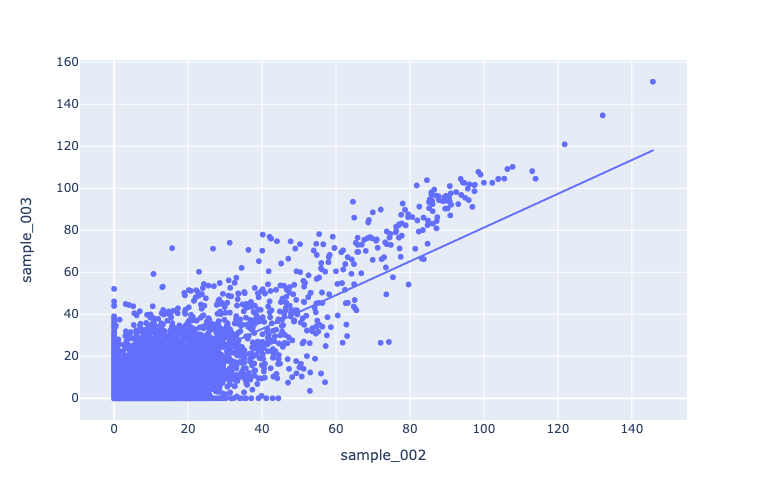

In [13]:
px.scatter(
    sample_cell_type_geps["B"].unstack(0),
    x="sample_002",
    y="sample_003",
    trendline="ols")

In [14]:
fractions

B   CAF  Endothelial  Macrophage  Malignant    NK  T CD4  \
Mixture                                                                   
sample_000  0.12  0.00         0.12        0.06       0.02  0.20   0.14   
sample_001  0.04  0.00         0.24        0.08       0.22  0.22   0.00   
sample_002  0.10  0.12         0.04        0.00       0.00  0.20   0.42   
sample_003  0.02  0.18         0.00        0.06       0.04  0.22   0.10   
sample_004  0.04  0.04         0.04        0.08       0.00  0.26   0.00   
sample_005  0.30  0.02         0.26        0.04       0.00  0.00   0.16   
sample_006  0.34  0.00         0.10        0.00       0.06  0.06   0.00   
sample_007  0.06  0.28         0.08        0.00       0.06  0.00   0.00   
sample_008  0.02  0.04         0.00        0.22       0.22  0.06   0.28   
sample_009  0.28  0.04         0.12        0.02       0.14  0.00   0.04   
sample_010  0.10  0.00         0.00        0.00       0.26  0.32   0.22   
sample_011  0.14  0.12         0.16        0.02       0.04  0.06   0.00   
sample_012  0.14  0.00         0.08        0.06       0.18  0.22   0.26   
sample_013  0.06  0.00         0.02        0.10       0.40  0.04   0.24   
sample_014  0.04  0.22         0.06        0.02       0.10  0.50   0.00   
sample_015  0.16  0.04         0.18        0.02       0.06  0.38   0.12   
sample_016  0.00  0.18         0.02        0.00       0.22  0.00   0.02   
sample_017  0.00  0.26         0.02        0.36       0.00  0.12   0.02   
sample_018  0.08  0.00         0.14        0.00       0.10  0.22   0.08   
sample_019  0.00  0.00         0.00        0.00       0.28  0.08   0.16   

            T CD8  T.cell  
Mixture                    
sample_000   0.12    0.22  
sample_001   0.10    0.10  
sample_002   0.06    0.06  
sample_003   0.12    0.26  
sample_004   0.52    0.02  
sample_005   0.18    0.04  
sample_006   0.12    0.32  
sample_007   0.02    0.50  
sample_008   0.16    0.00  
sample_009   0.20    0.16  
sample_010   0.00    0.10  
sample_011   0.26    0.20  
sample_012   0.00    0.06  
sample_013   0.12    0.02  
sample_014   0.06    0.00  
sample_015   0.02    0.02  
sample_016   0.50    0.06  
sample_017   0.22    0.00  
sample_018   0.18    0.20  
sample_019   0.18    0.30

In [15]:
rng = np.random.default_rng(seed=0)

# PARAM -- set noise level
# mixture_noise = 1
mixture_noise = rng.uniform(low=0.9, high=1.1, size=(g, s))

mixtures = pd.DataFrame({
    sample: sample_cell_type_geps.loc[sample] @ fractions.loc[sample]
    for sample in samples
}) * mixture_noise

mixtures

sample_000  sample_001  sample_002  sample_003  sample_004  \
GeneSymbol                                                               
C9orf152      0.000000    0.000000    0.000000    0.079769    0.000000   
RPS11        66.620117   63.743738   77.116288   72.241072   82.504369   
ELMO2         2.584898    6.287317    6.363024    8.671183    3.829972   
CREB3L1       0.000000    0.000000    0.731788    3.310783    0.000000   
PNMA1         3.981003    6.288129    2.916802    2.944074    4.581718   
...                ...         ...         ...         ...         ...   
PIK3IP1      31.740303    9.326037   15.974454   25.903211   19.198473   
SNRPD2       30.650661   19.920020   29.504256   27.321975   45.966516   
SLC39A6       2.852448   10.282199    4.623860    4.425329    2.350710   
CTSC         35.670676   30.558299   26.253236   37.499503   33.515319   
AQP7          0.000000    0.000000    0.000000    0.000000    0.000000   

            sample_005  sample_006  sample_007  sample_008  sample_009  \
GeneSymbol                                                               
C9orf152      0.000000    0.000000    0.000000    0.000000    0.000000   
RPS11        75.051678   92.046398   77.957870   66.131249   73.790022   
ELMO2         5.719872    1.834729    2.591375    9.311658    6.742488   
CREB3L1       0.183541    0.000000    0.000000    0.191442    0.763777   
PNMA1         3.346184    3.315056    0.846854    6.121080    7.413819   
...                ...         ...         ...         ...         ...   
PIK3IP1      23.427953   32.006652   24.926120   13.737700   23.289890   
SNRPD2       33.145963   33.137619   42.347272   29.047629   33.640377   
SLC39A6      11.589153    3.011311    3.037250    6.933115    5.865972   
CTSC         27.551547   25.159132   25.336683   39.736001   24.106969   
AQP7          0.884304    0.059766    0.329917    0.000000    1.542193   

            sample_010  sample_011  sample_012  sample_013  sample_014  \
GeneSymbol                                                               
C9orf152      0.000000    0.000000    0.057409    0.044713    0.000000   
RPS11        78.407871   77.805100   65.927124   77.249436   65.491862   
ELMO2         6.443385    7.493314    5.575386    4.657758    3.856033   
CREB3L1       0.000000    0.032589    0.000000    0.064586    2.749000   
PNMA1         6.610608    3.115081    8.489121    4.118954   10.129066   
...                ...         ...         ...         ...         ...   
PIK3IP1      32.666706   13.619636   29.267446   24.515548   15.774350   
SNRPD2       36.165164   34.589629   30.643876   34.038718   35.017455   
SLC39A6       3.470388    8.540174    8.886879   11.006792    8.091247   
CTSC         30.233978   21.746394   27.832555   25.329716   32.150806   
AQP7          0.000000    0.000000    0.000000    0.000000    0.000000   

            sample_015  sample_016  sample_017  sample_018  sample_019  
GeneSymbol                                                              
C9orf152      0.000000    0.000000    0.032339    0.000000    0.000000  
RPS11        76.181077   78.889263   67.664980   89.456948   72.063468  
ELMO2         2.514955    2.517963    9.139927    3.552551    7.061525  
CREB3L1       0.934270    0.476877    1.237140    0.000000    0.458972  
PNMA1        12.218482    1.315353    3.948208    3.374610    2.693436  
...                ...         ...         ...         ...         ...  
PIK3IP1      23.156458   17.015869   15.103960   32.311440   40.866317  
SNRPD2       30.495667   27.307207   21.171386   43.226355   34.966284  
SLC39A6       2.883256    4.835998    7.483262    4.858300   12.880042  
CTSC         24.711190   26.326617   39.508646   30.136173   27.169932  
AQP7          0.079471    0.456099    0.000000    0.052108    0.000000  

[23686 rows x 20 columns]

In [16]:
(mixtures.values < 0).any()

False

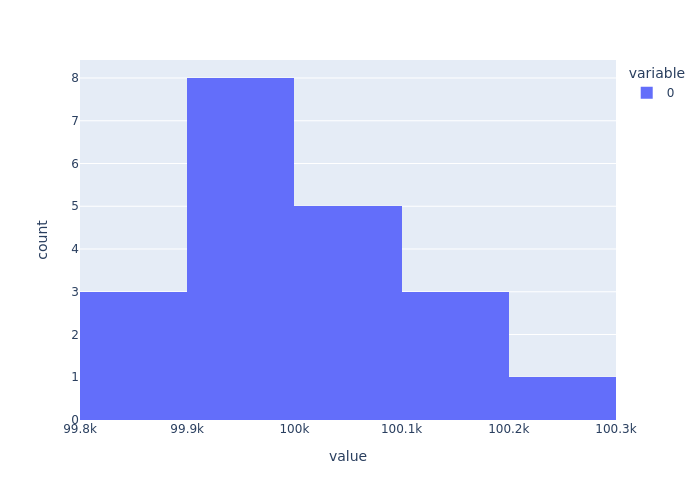

In [17]:
px.histogram(mixtures.sum(axis="rows"))

# set up cibersortx GEP imputation - "group" mode

In [18]:
base_path = os.path.abspath(os.path.join(results_dir, "group_mode"))

In [19]:
!sudo chown -R jupyter:jupyter $base_path
!rm -r $base_path
# os.makedirs(base_path, exist_ok=True)
# os.makedirs(os.path.join(base_path, "in"), exist_ok=True)
!mkdir -p $base_path/in

path = os.path.join(base_path, "in", "mixtures_computed.txt")
mixtures.to_csv(path, sep="\t")
print(path)

path = os.path.join(base_path, "fractions_known_and_empty_csx_metrics.txt")
fractions_and_empty_csx_metrics.to_csv(path, sep="\t")
print(path)

path = os.path.join(base_path, "in", "dummy_geps.txt")
sample_cell_type_geps.loc["sample_003"].to_csv(path, sep="\t")
print(path)

chown: cannot access '/home/jupyter/deconv/5d_results_noise_0.1/group_mode': No such file or directory
rm: cannot remove '/home/jupyter/deconv/5d_results_noise_0.1/group_mode': No such file or directory
/home/jupyter/deconv/5d_results_noise_0.1/group_mode/in/mixtures_computed.txt
/home/jupyter/deconv/5d_results_noise_0.1/group_mode/fractions_known_and_empty_csx_metrics.txt
/home/jupyter/deconv/5d_results_noise_0.1/group_mode/in/dummy_geps.txt


In [20]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.1/group_mode
├── [1.2K]  fractions_known_and_empty_csx_metrics.txt
└── [4.0K]  in
    ├── [2.2M]  dummy_geps.txt
    └── [6.4M]  mixtures_computed.txt

1 directory, 3 files


In [21]:
!docker run \
    --rm \
    -it \
    -v $base_path/in:/src/data \
    -v $base_path:/src/outdir \
    cibersortx/gep:latest \
    --username lyronctk@stanford.edu \
    --token dfeba2c8b9d61daebee5fa87026b8e56 \
    --mixture mixtures_computed.txt \
    --cibresults fractions_known_and_empty_csx_metrics.txt \
    --sigmatrix dummy_geps.txt

!sudo chown -R jupyter:jupyter $base_path

>Running CIBERSORTx GEP imputation (representative profiles only)...
>[Options] username: lyronctk@stanford.edu
>[Options] token: dfeba2c8b9d61daebee5fa87026b8e56
>[Options] mixture: mixtures_computed.txt
>[Options] cibresults: fractions_known_and_empty_csx_metrics.txt
>[Options] sigmatrix: dummy_geps.txt
>Previous estimates of cell proportions detected. To rerun, use redocibersort=TRUE.
>Loaded 20 mixture samples, 23686 genes, and 9 cell subsets...
>Imputing representative cell type GEPs...done.
>Writing output to disk...done.
>Running time (sec): 28


In [22]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.1/group_mode
├── [2.3M]  CIBERSORTxGEP_GEPs.txt
├── [3.1M]  CIBERSORTxGEP_GEPs_CVs.txt
├── [1.3M]  CIBERSORTxGEP_GEPs_Filtered.txt
├── [2.4M]  CIBERSORTxGEP_GEPs_Pvals.txt
├── [661K]  CIBERSORTxGEP_GEPs_Qvals.txt
├── [3.0M]  CIBERSORTxGEP_GEPs_StdErrs.txt
├── [582K]  CIBERSORTxGEP_GEPs_ThresholdPlots.pdf
├── [1.3M]  CIBERSORTxGEP_SM_GEPs_Filtered.txt
├── [1.4K]  CIBERSORTxGEP_Weights.txt
├── [1.2K]  fractions_known_and_empty_csx_metrics.txt
└── [4.0K]  in
    ├── [2.2M]  dummy_geps.txt
    └── [6.4M]  mixtures_computed.txt

1 directory, 12 files


In [23]:
pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs.txt"),
    sep="\t",
    index_col=0,
)

B        CAF  Endothelial  Macrophage  Malignant  \
GeneSymbol                                                             
A1BG         0.000000   0.000000     2.325883    4.451073   6.101575   
A1BG.AS1     1.913246   0.000000     7.251813    0.895909   0.000000   
A1CF         1.037240   0.379768     0.816715    0.000000   0.008376   
A2M          1.267475  24.772294    50.826989   20.580262  34.068700   
A2M.AS1      0.000000   5.435577     0.000000    0.000000   3.257681   
...               ...        ...          ...         ...        ...   
ZYG11A      15.427053   3.969109     4.904108    3.103809   6.057715   
ZYG11B      12.405232   4.671956     2.454266    4.549720   3.550000   
ZYX          0.464894  13.663659    23.796207   21.683710   6.946417   
ZZEF1        1.243061   1.184249     3.061175    9.523256   2.656139   
ZZZ3         3.840155   0.000000     4.959240    5.301476   9.996097   

                  NK      T CD4      T CD8     T.cell  
GeneSymbol                                             
A1BG        0.000000   0.000000   0.007801   2.787094  
A1BG.AS1    0.000000   0.508815   1.100032   0.000000  
A1CF        0.143936   1.341489   0.415853   0.000000  
A2M         0.000000   3.339382   0.000000   1.781450  
A2M.AS1     3.772492   0.786106   0.000000   1.784555  
...              ...        ...        ...        ...  
ZYG11A      6.187306  15.857343  10.196770  13.027820  
ZYG11B      5.398363  15.104080   8.559671  15.819621  
ZYX         6.297132  12.289526  13.476093  12.675371  
ZZEF1       1.287793   7.227032   2.664185   9.862325  
ZZZ3        0.171540   6.443272   0.000000   3.880679  

[23686 rows x 9 columns]

In [24]:
true_geps_on_average = sample_cell_type_geps.groupby(level=1).mean()

imputed_global_geps = pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs.txt"),
    sep="\t",
    index_col=0,
).set_index(true_geps_on_average.index)

both = pd.concat({
        "truth": true_geps_on_average,
        "imputed": imputed_global_geps
    },
    axis=1,
    names=["result", "cell_type"]
)

In [25]:
both = both * 100000.0 / both.sum(axis='rows')

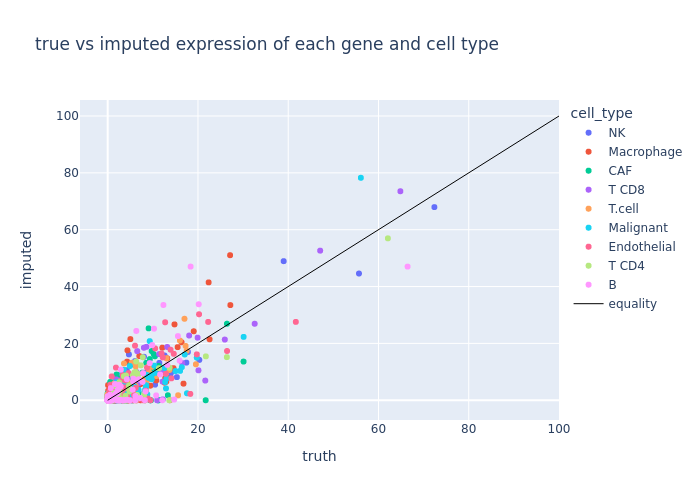

In [26]:
fig = px.scatter(
    both.stack().reset_index().sample(1000),
    x="truth",
    y="imputed",
    color="cell_type",
    title="true vs imputed expression of each gene and cell type"
)

fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100], mode='lines', line=dict(color='black', width=1), name='equality'))

fig

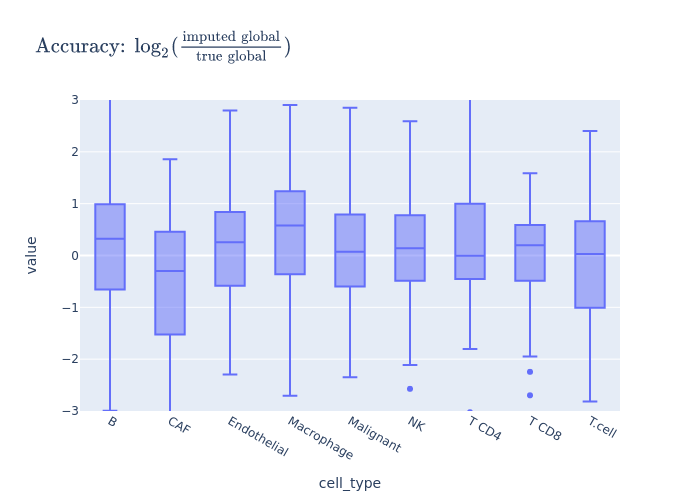

In [27]:
fig = px.box(
    np.log((both["imputed"] / both["truth"]).sample(100)) / np.log(2),
    title="$\\text{Accuracy: }\log_2(\\frac{\\text{imputed global}}{\\text{true global}})$"
)

fig.update_yaxes(range=[-3, 3])

fig.show("png")

In [28]:
both.iloc[0:3]

result         truth                                                       \
cell_type          B       CAF Endothelial Macrophage Malignant        NK   
GeneSymbol                                                                  
A1BG        0.698394  4.075852    2.170533   1.986248  3.640094  0.000000   
A1BG-AS1    1.202019  2.119658    0.508904   2.871986  1.656740  1.314537   
A1CF        0.747286  0.295965    0.149029   0.119026  0.111963  0.979706   

result                                     imputed                        \
cell_type      T CD4     T CD8    T.cell         B       CAF Endothelial   
GeneSymbol                                                                 
A1BG        1.293370  1.356777  1.490515  0.000000  0.000000    2.306967   
A1BG-AS1    1.170716  1.064801  0.641189  1.947885  0.000000    7.192835   
A1CF        0.684655  0.389618  0.336012  1.056019  0.373284    0.810073   

result                                                                   
cell_type  Macrophage Malignant        NK     T CD4     T CD8    T.cell  
GeneSymbol                                                               
A1BG         4.272713  6.175360  0.000000  0.000000  0.008053  2.873075  
A1BG-AS1     0.860009  0.000000  0.000000  0.514062  1.135495  0.000000  
A1CF         0.000000  0.008478  0.149511  1.355325  0.429259  0.000000

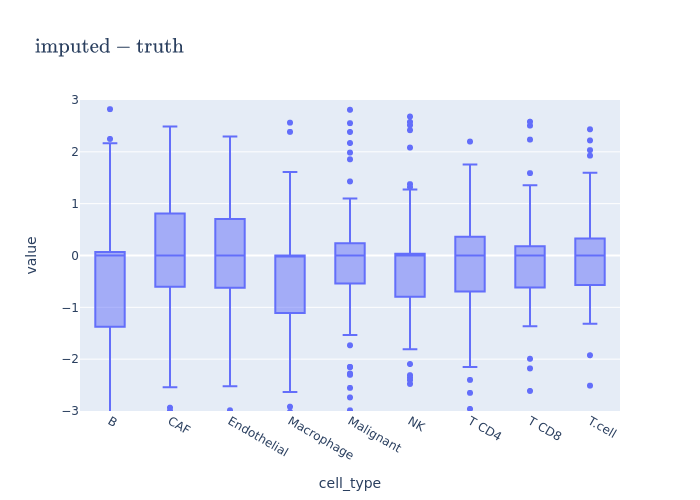

In [29]:
fig = px.box(
    (both["imputed"] - both["truth"]).sample(100),
    title="$\\text{imputed} - \\text{truth}$"
)
# 
fig.update_yaxes(range=[-3, 3])

fig.show("png")

In [30]:
relative_error = (both["imputed"] - both["truth"]) / both["truth"]

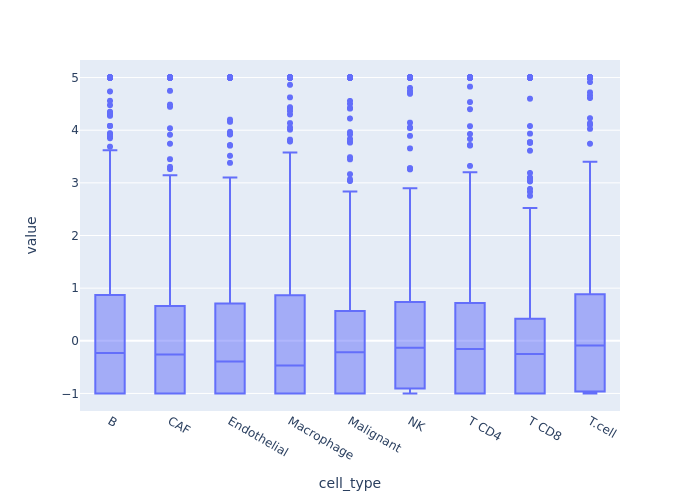

In [31]:
px.box(
    relative_error.clip(upper=5).sample(1000),
)

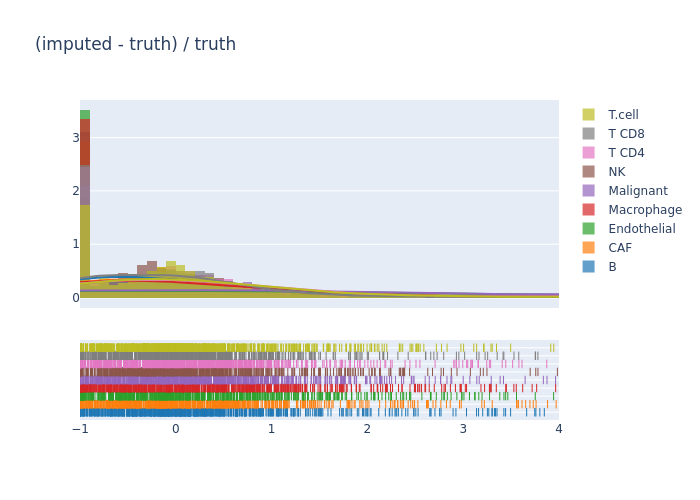

In [32]:
import plotly.figure_factory as ff

data_for_plot = relative_error\
    .replace([np.inf, -np.inf], np.nan)\
    .dropna()\
    .sample(1000)\
    .values.T.tolist()

fig = ff.create_distplot(
    data_for_plot,
    group_labels=both["truth"].columns,
    bin_size=.1
)

fig.update_layout(
    title='(imputed - truth) / truth'
)

fig.update_xaxes(range=[-1, 4])

fig

# set up cibersortx GEP imputation - "hires" mode

In [33]:
# base_path = os.path.abspath("./5c_results/hires")
base_path = os.path.abspath(os.path.join(results_dir, "hires"))

In [34]:
!sudo chown -R jupyter:jupyter $base_path
!rm -r $base_path
!mkdir -p $base_path/in

path = os.path.join(base_path, "in", "mixtures_computed.txt")
mixtures.to_csv(path, sep="\t")
print(path)

path = os.path.join(base_path, "fractions_known.txt")
fractions.to_csv(path, sep="\t")
print(path)

chown: cannot access '/home/jupyter/deconv/5d_results_noise_0.1/hires': No such file or directory
rm: cannot remove '/home/jupyter/deconv/5d_results_noise_0.1/hires': No such file or directory
/home/jupyter/deconv/5d_results_noise_0.1/hires/in/mixtures_computed.txt
/home/jupyter/deconv/5d_results_noise_0.1/hires/fractions_known.txt


In [35]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.1/hires
├── [1.1K]  fractions_known.txt
└── [4.0K]  in
    └── [6.4M]  mixtures_computed.txt

1 directory, 2 files


In [36]:
!rm $base_path/CIBERSORT*

!docker run \
    --rm \
    -it \
    -v $base_path/in:/src/data \
    -v $base_path:/src/outdir \
    cibersortx/hires:latest \
    --username lyronctk@stanford.edu \
    --token dfeba2c8b9d61daebee5fa87026b8e56 \
    --mixture mixtures_computed.txt \
    --cibresults fractions_known.txt

'''
    --sigmatrix cell_type_geps_known.txt
'''

!sudo chown -R jupyter:jupyter $base_path

rm: cannot remove '/home/jupyter/deconv/5d_results_noise_0.1/hires/CIBERSORT*': No such file or directory
>Running CIBERSORTx high-resolution GEP imputation...
>[Options] username: lyronctk@stanford.edu
>[Options] token: dfeba2c8b9d61daebee5fa87026b8e56
>[Options] mixture: mixtures_computed.txt
>[Options] cibresults: fractions_known.txt
>Loaded 20 mixture samples, 23686 genes, and 9 cell subsets...
>Window size adaptively set to 10
>Imputing high-resolution cell type GEPs...done.
>Writing output to disk ...done.
>Running time (sec): 96


In [37]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.1/hires
├── [9.2M]  CIBERSORTxHiRes_NA_B_Window10.txt
├── [9.2M]  CIBERSORTxHiRes_NA_CAF_Window10.txt
├── [9.2M]  CIBERSORTxHiRes_NA_Endothelial_Window10.txt
├── [ 33K]  CIBERSORTxHiRes_NA_Heatmap_B_Window10.png
├── [ 36K]  CIBERSORTxHiRes_NA_Heatmap_CAF_Window10.png
├── [ 31K]  CIBERSORTxHiRes_NA_Heatmap_Endothelial_Window10.png
├── [ 32K]  CIBERSORTxHiRes_NA_Heatmap_Macrophage_Window10.png
├── [ 43K]  CIBERSORTxHiRes_NA_Heatmap_Malignant_Window10.png
├── [ 48K]  CIBERSORTxHiRes_NA_Heatmap_NK_Window10.png
├── [ 47K]  CIBERSORTxHiRes_NA_Heatmap_T.cell_Window10.png
├── [ 45K]  CIBERSORTxHiRes_NA_Heatmap_TCD4_Window10.png
├── [ 47K]  CIBERSORTxHiRes_NA_Heatmap_TCD8_Window10.png
├── [9.2M]  CIBERSORTxHiRes_NA_Macrophage_Window10.txt
├── [9.2M]  CIBERSORTxHiRes_NA_Malignant_Window10.txt
├── [9.2M]  CIBERSORTxHiRes_NA_NK_Window10.txt
├── [9.2M]  CIBERSORTxHiRes_NA_T.cell_Window10.txt
├── [9.2M]  CIBERSORTxHiRes_NA_TCD4_Window10.txt
├── [9.2M]  CIBERSO

In [38]:
inferred_cell_type_geps = dict()
standard_gene_index = sample_cell_type_geps["B"].loc["sample_000"].index

for path in glob.glob(os.path.join(base_path, "CIBERSORTxHiRes_NA_*_Window*txt")):
    file = os.path.basename(path)
    cell_type = file.split("_")[2]
    print(cell_type)
    df = pd.read_csv(path, sep="\t", index_col=0).rename_axis(columns="sample")
    df = df.set_index(standard_gene_index)
    inferred_cell_type_geps[cell_type] = df

all_inferred_geps = \
    pd.concat(inferred_cell_type_geps, names=["cell_type"])\
    .stack()\
    .reset_index()\
    .set_index(['sample', 'GeneSymbol', 'cell_type'])\
    .unstack(level=-1)[0]\
    .rename(columns=weird_to_nice)

T.cell
Endothelial
TCD8
TCD4
CAF
Malignant
B
NK
Macrophage


In [39]:
all_inferred_geps.head(10)

cell_type                B        CAF  Endothelial  Macrophage  Malignant  \
sample     GeneSymbol                                                       
sample_000 A1BG        1.0   1.000000     1.000000         1.0  10.298689   
           A1BG-AS1    1.0   1.000000     1.000000         1.0   1.000000   
           A1CF        1.0   1.000000     1.000000         1.0   1.000000   
           A2M         1.0  21.184229    53.251412         1.0  41.153979   
           A2M-AS1     1.0   1.000000     1.000000         1.0   1.000000   
           A2ML1       1.0   1.000000     1.000000         1.0   1.000000   
           A2MP1       1.0   1.000000     1.000000         1.0   1.000000   
           A4GALT      1.0   2.884110     1.000000         1.0   1.000000   
           A4GNT       1.0   1.000000     1.000000         1.0   1.000000   
           AA06        1.0   1.000000     1.000000         1.0   1.000000   

cell_type               NK  T.cell  T CD4  T CD8  
sample     GeneSymbol                             
sample_000 A1BG        1.0     1.0    1.0    1.0  
           A1BG-AS1    1.0     1.0    1.0    1.0  
           A1CF        1.0     1.0    1.0    1.0  
           A2M         1.0     1.0    1.0    1.0  
           A2M-AS1     1.0     1.0    1.0    1.0  
           A2ML1       1.0     1.0    1.0    1.0  
           A2MP1       1.0     1.0    1.0    1.0  
           A4GALT      1.0     1.0    1.0    1.0  
           A4GNT       1.0     1.0    1.0    1.0  
           AA06        1.0     1.0    1.0    1.0

In [40]:
truth_and_imputed = pd.concat(
    {
        "truth": sample_cell_type_geps,
        "imputed": all_inferred_geps
    },
    axis=0,
    names=["result", "sample", "GeneSymbol"]
).stack().unstack(0).reset_index()

In [41]:
truth_and_imputed

result       sample GeneSymbol    cell_type      truth    imputed
0        sample_000       A1BG            B   0.000000   1.000000
1        sample_000       A1BG          CAF   2.939188   1.000000
2        sample_000       A1BG  Endothelial   0.000000   1.000000
3        sample_000       A1BG   Macrophage   3.545610   1.000000
4        sample_000       A1BG    Malignant   0.000000  10.298689
...             ...        ...          ...        ...        ...
4263475  sample_019       ZZZ3    Malignant   5.997763  23.138936
4263476  sample_019       ZZZ3           NK  10.191888   1.000000
4263477  sample_019       ZZZ3        T CD4   3.340547   1.000000
4263478  sample_019       ZZZ3        T CD8   9.730685   1.000000
4263479  sample_019       ZZZ3       T.cell  11.518748   1.000000

[4263480 rows x 5 columns]

In [42]:
# truth = sample_cell_type_geps["B"].unstack(level=0)

# imputed = pd.read_csv(
#     os.path.join(base_path, "CIBERSORTxHiRes_NA_B_Window36.txt"),
#     sep="\t",
#     index_col=0
# ).set_index(truth.index)

# truth_and_imputed = pd.concat(
#     {
#         "truth": truth,
#         "imputed": imputed
#     },
#     axis=1,
# #     names=["result"]
# ).stack()

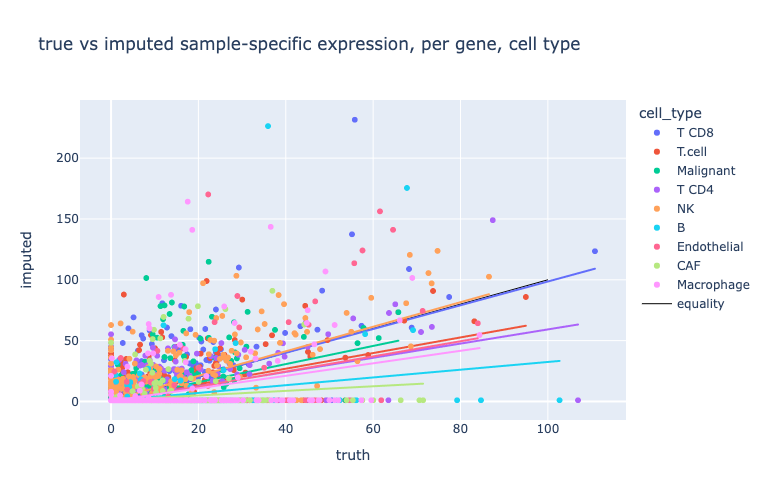

In [43]:
fig = px.scatter(
    truth_and_imputed.sample(10000),
    x="truth",
    y="imputed",
    color="cell_type",
    title="true vs imputed sample-specific expression, per gene, cell type",
    trendline='ols'
)

fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100], mode='lines', line=dict(color='black', width=1), name='equality'))

fig

# Comparing global and sample-specific cell type GEPs

In [44]:
both

result          truth                                                          \
cell_type           B        CAF Endothelial Macrophage  Malignant         NK   
GeneSymbol                                                                      
A1BG         0.698394   4.075852    2.170533   1.986248   3.640094   0.000000   
A1BG-AS1     1.202019   2.119658    0.508904   2.871986   1.656740   1.314537   
A1CF         0.747286   0.295965    0.149029   0.119026   0.111963   0.979706   
A2M          0.464141  22.556537   52.897590  25.780177  25.843115   3.809680   
A2M-AS1      0.009796   1.253698    1.382790   0.420562   0.949646   4.135640   
...               ...        ...         ...        ...        ...        ...   
ZYG11A      11.340898   5.560307    6.878483   4.569502   3.851828  11.858939   
ZYG11B       7.513011   6.812368    7.324367   4.460828   4.738135   8.544230   
ZYX          6.451608  19.071737   12.179167  24.288485   8.446292  11.401811   
ZZEF1        4.060056   2.715784    3.846453   3.271560   2.218172   3.733918   
ZZZ3         6.501766   2.028064    4.874423   2.773249   5.098960   3.120074   

result                                         imputed                         \
cell_type       T CD4      T CD8     T.cell          B        CAF Endothelial   
GeneSymbol                                                                      
A1BG         1.293370   1.356777   1.490515   0.000000   0.000000    2.306967   
A1BG-AS1     1.170716   1.064801   0.641189   1.947885   0.000000    7.192835   
A1CF         0.684655   0.389618   0.336012   1.056019   0.373284    0.810073   
A2M          1.666999   3.210854   2.596384   1.290422  24.349329   50.413624   
A2M-AS1      2.211539   1.372760   1.787977   0.000000   5.342769    0.000000   
...               ...        ...        ...        ...        ...         ...   
ZYG11A      11.593231   9.397929  11.634971  15.706361   3.901340    4.864224   
ZYG11B      11.003574   9.454269   8.854056  12.629829   4.592186    2.434306   
ZYX         10.242265  11.267646   9.736840   0.473311  13.430364   23.602677   
ZZEF1        5.069339   5.435131   5.830179   1.265567   1.164029    3.036279   
ZZZ3         4.555998   4.162746   5.103926   3.909681   0.000000    4.918907   

result                                                                       
cell_type  Macrophage  Malignant        NK      T CD4      T CD8     T.cell  
GeneSymbol                                                                   
A1BG         4.272713   6.175360  0.000000   0.000000   0.008053   2.873075  
A1BG-AS1     0.860009   0.000000  0.000000   0.514062   1.135495   0.000000  
A1CF         0.000000   0.008478  0.149511   1.355325   0.429259   0.000000  
A2M         19.755587  34.480683  0.000000   3.373824   0.000000   1.836407  
A2M-AS1      0.000000   3.297075  3.918626   0.794214   0.000000   1.839608  
...               ...        ...       ...        ...        ...        ...  
ZYG11A       2.979436   6.130969  6.426981  16.020890  10.525502  13.429724  
ZYG11B       4.367408   3.592929  5.607478  15.259859   8.835625  16.307651  
ZYX         20.814818   7.030418  6.541062  12.416276  13.910547  13.066402  
ZZEF1        9.141648   2.688259  1.337678   7.301569   2.750075  10.166575  
ZZZ3         5.089040  10.116977  0.178185   6.509726   0.000000   4.000396  

[23686 rows x 18 columns]